In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
pd.set_eng_float_format(accuracy=2, use_eng_prefix=True)

Text(0.5,1,'SPY Closing Price')

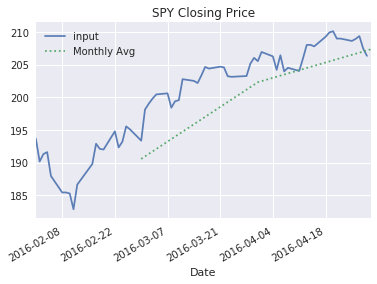

In [129]:
spy.Close.plot(alpha=0.9, style='-')
spy.Close.resample('M').mean().plot(style=':')
plt.legend(['input', 'Monthly Avg'],loc='upper left')
plt.title('SPY Closing Price')

In [63]:
def dayofweek_strat(ticker, start_time, end_time, buy_day, sell_day, position_time):
    df = pdr.data.DataReader(ticker, start=start_time, end=end_time, data_source='google')
    df['Day'] = df.index.dayofweek
    df['Week'] = df.index.weekofyear
    df['Year'] = df.index.year
    pivot = df.pivot_table(values=position_time, index=['Year','Week'],columns='Day').dropna(how='any')
    pivot['Profit'] = pivot[sell_day] - pivot[buy_day]
    strat_profit = pivot['Profit'].sum()
    hold_profit = df[position_time].iloc[-1] - df[position_time].iloc[0]

    return print("You would make %.2f trading and %.2f holding" % (strat_profit, hold_profit))

In [135]:
dayofweek_strat('SPY','2017-Mar','2017-May',2,4,'Open')

You would make 2.35 trading and 0.29 holding


In [136]:
dayofweek_strat('SPY','2016-Mar','2016-May',2,4,'Open')

You would make 1.43 trading and 11.71 holding


In [137]:
dayofweek_strat('SPY','2015-Mar','2015-May',2,4,'Open')

You would make 0.10 trading and -1.38 holding


In [78]:
dayofweek_strat('TGT','2016','2017',0,2,'Close')

You would make -1.74 trading and -1.32 holding


In [66]:
for bd in np.arange(4):
    for sd in np.arange(5):
        dayofweek_strat('TGT','2015','2017',bd,sd,'Close')
        print(bd,sd)

You would make 0.00 trading and 37.29 holding
0 0
You would make 13.79 trading and 37.29 holding
0 1
You would make 17.40 trading and 37.29 holding
0 2
You would make 31.98 trading and 37.29 holding
0 3
You would make 22.43 trading and 37.29 holding
0 4
You would make -13.79 trading and 37.29 holding
1 0
You would make 0.00 trading and 37.29 holding
1 1
You would make 3.61 trading and 37.29 holding
1 2
You would make 18.19 trading and 37.29 holding
1 3
You would make 8.64 trading and 37.29 holding
1 4
You would make -17.40 trading and 37.29 holding
2 0
You would make -3.61 trading and 37.29 holding
2 1
You would make 0.00 trading and 37.29 holding
2 2
You would make 14.58 trading and 37.29 holding
2 3
You would make 5.03 trading and 37.29 holding
2 4
You would make -31.98 trading and 37.29 holding
3 0
You would make -18.19 trading and 37.29 holding
3 1
You would make -14.58 trading and 37.29 holding
3 2
You would make 0.00 trading and 37.29 holding
3 3
You would make -9.55 trading and 

In [175]:
def dayofweek_pivot(ticker, start_time, end_time, buy_day, sell_day, position_time):
    df = data.DataReader(ticker, start=start_time, end=end_time,
                         data_source='google')
    df['Day'] = df.index.dayofweek
    df['Week'] = df.index.weekofyear
    df['Year'] = df.index.year
    pivot = df.pivot_table(values=position_time, index=['Year','Week'],columns='Day').dropna(how='any')
    pivot['Profit'] = pivot[sell_day] - pivot[buy_day]
    pivot['hold_profit'] = df[position_time].iloc[-1] - df[position_time].iloc[0]

    return pivot
profit_piv = dayofweek_pivot('DLTR','2017','2018',0,4,'Open')
profit_piv

Day             0       1       2       3       4   Profit  hold_profit
Year Week                                                              
2017 2      76.74   77.05   77.70   77.81   77.49  750.00m        30.29
     4      76.58   75.54   77.41   76.66   76.34 -240.00m        30.29
     5      73.49   74.80   77.01   76.76   77.08     3.59        30.29
     6      76.71   74.50   75.35   79.12   79.73     3.02        30.29
     7      78.43   77.50   79.40   78.70   77.93 -500.00m        30.29
     9      79.70   78.54   78.97   76.91   77.47    -2.23        30.29
     10     77.00   75.73   75.34   75.61   75.83    -1.17        30.29
     11     75.10   74.68   74.11   74.00   76.48     1.38        30.29
     12     75.79   74.72   73.58   74.64   74.51    -1.28        30.29
     13     74.89   75.83   76.32   78.21   79.28     4.39        30.29
     14     78.46   77.76   77.68   77.06   78.05 -410.00m        30.29
     16     76.67   76.73   77.81   78.45   79.73     3.06        30.29
     17     80.02   80.28   81.00   81.73   82.98     2.96        30.29
     18     83.07   80.75   81.73   82.10   82.38 -690.00m        30.29
     19     82.13   82.46   82.53   82.35   81.31 -820.00m        30.29
     20     81.50   80.78   79.16   78.34   78.97    -2.53        30.29
     21     79.62   80.85   78.86   76.02   79.15 -470.00m        30.29
     23     80.15   78.61   77.33   75.79   74.85    -5.30        30.29
     24     75.43   75.27   75.52   74.82   69.67    -5.76        30.29
     25     70.53   70.62   69.04   68.10   67.35    -3.18        30.29
     26     66.81   68.30   70.48   69.83   70.01     3.20        30.29
     28     67.90   66.53   67.35   68.05   68.79  890.00m        30.29
     29     69.11   69.87   69.53   70.60   70.62     1.51        30.29
     30     70.60   69.38   70.30   70.97   71.92     1.32        30.29
     31     72.00   72.10   72.74   73.12   73.77     1.77        30.29
     32     74.57   75.53   75.14   74.26   73.01    -1.56        30.29
     33     74.14   74.57   74.26   74.03   74.24  100.00m        30.29
     34     74.22   74.51   74.63   82.21   79.88     5.66        30.29
     35     80.78   79.59   79.76   79.23   79.79 -990.00m        30.29
     37     83.14   83.32   83.97   84.14   83.59  450.00m        30.29
     38     83.45   83.09   83.44   83.44   83.12 -330.00m        30.29
     39     84.08   85.21   85.27   85.15   85.68     1.60        30.29
     40     86.60   86.75   88.00   89.04   88.64     2.04        30.29
     41     89.61   88.56   89.20   91.23   90.16  550.00m        30.29
     42     91.06   91.70   91.45   91.40   91.95  890.00m        30.29
     43     92.38   91.61   91.50   92.12   92.02 -360.00m        30.29
     44     92.52   91.63   91.60   91.20   93.28  760.00m        30.29
     45     93.48   93.47   93.32   93.35   94.14  660.00m        30.29
     46     94.71   93.48   92.83   93.56   94.79   80.00m        30.29
     48     98.32   98.39  101.31  104.15  101.82     3.50        30.29
     49    104.49  106.26  106.19  107.93  107.58     3.09        30.29
     50    108.67  107.58  106.00  106.15  105.21    -3.46        30.29
     51    107.06  109.52  109.63  109.32  108.45     1.39        30.29

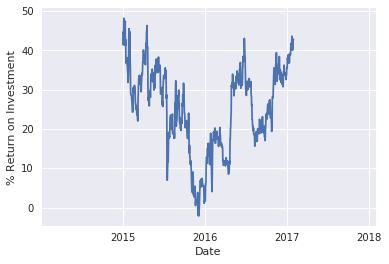

In [13]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

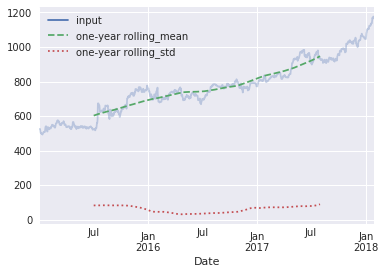

In [14]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [12]:
wmt = pdr.data.get_data_google('WMT', start='2016', end='2018')
wmt

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-04,60.50,61.49,60.36,61.46,11926062
2016-01-05,62.03,63.05,61.85,62.92,13325958
2016-01-06,62.48,63.95,62.47,63.55,16564620
2016-01-07,62.97,65.23,62.92,65.03,26430005
2016-01-08,65.08,65.41,63.41,63.54,17767864
2016-01-11,63.76,64.46,63.62,64.22,12653762
2016-01-12,64.38,64.73,63.43,63.62,12195893
2016-01-13,63.73,63.73,61.83,61.92,13672904
2016-01-14,62.00,63.62,61.82,63.06,12885473


In [9]:
from fbprophet import Prophet
import pandas_datareader as pdr

In [45]:
columns = ['ds','y']
ds = wmt.index
#close = wmt['close']
y = np.log10(wmt['Close'])
data = {'ds':ds, 'y':y}
df = pd.DataFrame(data=data, columns=columns).reset_index()
#del df['Date']
wmt_df = df

In [47]:
m = Prophet()
m.fit(wmt_df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


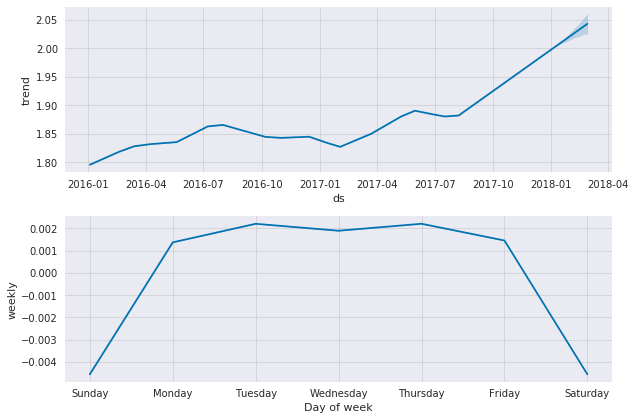

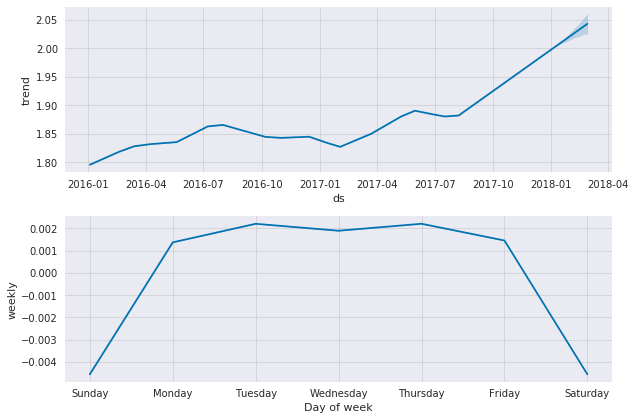

In [56]:
future = m.make_future_dataframe(60)
forecast = m.predict(future)
m.plot_components(forecast)